In [1]:
##########################
# 配置运行环境
##########################

%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot

# matplotlib 对中文的支持及保存为 pdf 格式
from matplotlib import font_manager
cn_font = font_manager.FontProperties(fname='msyh.ttf', size=16)  # 网上支持中文

from matplotlib import rcParams
# rcParams['font.family'] = 'Microsoft YaHei'  # 本地支持中文
rcParams['pdf.fonttype'] = 42
rcParams['figure.figsize'] = (8, 5)

# Look pretty...
from matplotlib import style
style.use('ggplot')

# 设置 numpy 的输出精度, 并且阻止使用科学记数法
np.set_printoptions(precision=6, suppress=True)

# 二元离散随机变量的期望



# 协方差

## 高尔顿 1895 父子身高数据

In [3]:
data = pd.read_csv("data/GaltonPearsonData.txt", sep=' ', header=None)
data.head()

,0,1,2
0,NaN,65.04851,59.77827
1,NaN,63.25094,63.21404
2,NaN,64.95532,63.34242
3,NaN,65.75250,62.79238
4,NaN,61.13723,64.28113


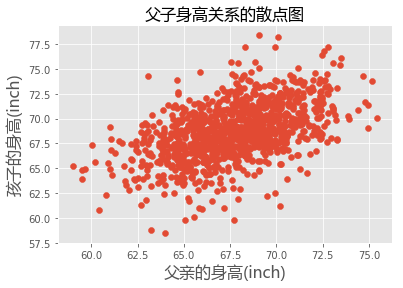

In [4]:
# 父亲的身高数据
father = data[1]
# 孩子的身高数据
son = data[2]

pyplot.scatter(father, son)

pyplot.title('父子身高关系的散点图', fontproperties=cn_font)
pyplot.xlabel('父亲的身高(inch)', fontproperties=cn_font)
pyplot.ylabel('孩子的身高(inch)', fontproperties=cn_font)
pyplot.show()

## 由脚印长度估计罪犯的身高

### 身高和脚长的关系

In [5]:
data = pd.read_csv("data/BodyData(2013.1).csv")
data.head()

,height,footSize,birthday
0,178,26.2,1/7
1,173,25.5,1/8
2,175,26.1,1/6
3,176,25.5,1/9
4,178,26.5,1/11


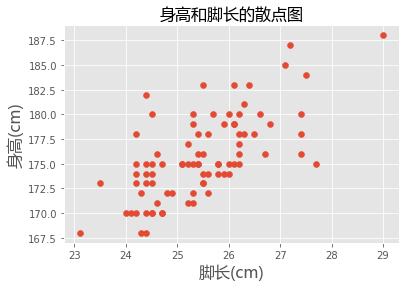

In [6]:
# 身高和脚长的散点图
pyplot.scatter(data['footSize'], data['height'])

pyplot.title('身高和脚长的散点图', fontproperties=cn_font)
pyplot.xlabel('脚长(cm)', fontproperties=cn_font)
pyplot.ylabel('身高(cm)', fontproperties=cn_font)
pyplot.show()

(array([ 4.,  2., 13., 11., 24., 16.,  9.,  2.,  3.,  1.]),
 array([0.134066, 0.136488, 0.13891 , 0.141332, 0.143754, 0.146176,
        0.148598, 0.15102 , 0.153442, 0.155864, 0.158286]),
 <a list of 10 Patch objects>)

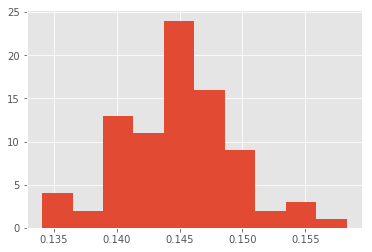

In [7]:
# 身高和脚长之比的直方图
pyplot.hist(data['footSize'] / data['height'])

在刑事侦查中，公安人员收集到罪犯脚印后，往往通过公式
$$
身高 = 脚印长度 \times 6.876
$$
估算罪犯的身高. 此公式是如何推导出来的?

分析：设一个人身高为 $X$，脚印长度为 $Y$. 显然，两者之间是有统计关系的，故应作为二维随机变量 $(X,Y)$ 来研究.

由于影响人类身高与脚印的随机因素是大量的、相互独立的，且各因素的影响又是微小的、可以叠加的. 故由中心极限定理知 $(X,Y)$ 可以近似看成服从二元正态分布 $N(\mu_1,\sigma_1^2,\mu_2,\sigma_1^2;\rho)$，其中参数 $\mu_1,\sigma_1^2,\mu_2,\sigma_1^2;\rho$ 因区域、民族、生活习惯的不同而有所变化，但它们都能通过统计方法而获得.

现已知罪犯的脚印长度为 $y$，要估计其身高就需计算条件期望 $E(X|Y=y)$，条件密度为
$$
f_{X|Y}(x|y)=\frac{f(x,y)}{f_Y(y)}
$$
这正是正态分布
$$
N\left(\mu_1+\rho\frac{\sigma_1}{\sigma_2}(y-\mu_2),\sigma_1^2(1-\rho^2)\right)
$$
的密度函数，因此
$$
E(X|Y=y)=\mu_1+\rho\frac{\sigma_1}{\sigma_2}(y-\mu_2)
$$
如果按中国人的相应参数代入上式，即可得出以脚印长度作自变量的身高近似公式.

# 相关系数

生成相关系数为指定值的二元数据集。

我们可以用 `numpy.random.multivariate_normal` 函数实现。

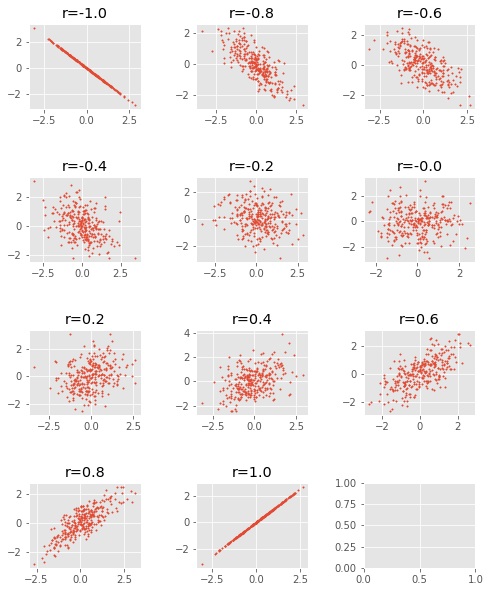

In [47]:
# 随机变量 X, Y 的均值
mu = np.array([0, 0])

# 随机变量 X, Y 的相关系数矩阵
corr_matrix = lambda r: np.array([[1, r], [r, 1]])

fig, axs = pyplot.subplots(4, 3, figsize=(8, 10))
fig.subplots_adjust(hspace=0.8, wspace=0.5)
axs = axs.ravel() # 获取所有子图

# 画不同相关系数样本点的散点图
for i, r in enumerate(np.arange(-1,1.2,0.2)):
    # 生成随机样本
    sample = np.random.multivariate_normal(mu, corr_matrix(r), size=300)
    axs[i].scatter(sample[:,0], sample[:,1], s=2)
    axs[i].set_title('r={:.1f}'.format(r))

### 练习：美国总统的就职年龄研究

In [ ]:
president_age = pd.read_csv( "data/AmericanPresidentAge.txt", sep=' ' )
president_age.head()

请根据上面的数据回答以下问题

1. 数据集的样本均值和样本方差
2. 画出直方图
3. 这一数据集是近似正态的吗？

In [ ]:
from scipy import mean, var, std

# 样本均值
mean(president_age[ 'InaugurationAge'])

美国总统的平均就职年龄是 54.6 岁。

In [ ]:
# 样本标准差
std( president_age[ 'InaugurationAge'] )

美国总统的平均就职年龄的平均波动是 6.2 岁。

In [ ]:
# 直方图
pyplot.hist( president_age[ 'InaugurationAge'], normed=True )

pyplot.title('美国总统的就职年龄的直方图')
pyplot.xlabel('年龄')
pyplot.ylabel('频率')
pyplot.show()

### 练习：癌症病人生存期研究

下面是患一种称为胶质母细胞瘤的脑肿瘤病人的生存期数据 (单位：月)

In [ ]:
tumor_data = [6, 5, 37, 10, 22, 9, 2, 16, 3, 3, 11, 9, 5, 14, 11, 3, 1, 4, 6, 2, 7, 3, 7, 5, 4, 8, 2, 7, 13, 16, 15, 9, 4, 4, 2, 3, 9, 5, 11, 3, 7, 5, 9, 3, 8, 9, 4, 10, 3, 2, 7, 6, 9, 3, 5, 4, 6, 4, 14, 3, 12, 6, 8, 12, 7]

试回答以下问题

1. 制作频数表和频数图
2. 制作频率表和频率图
3. 这个数据集近似对称吗

In [ ]:
# 频数表
fr = pd.value_counts( tumor_data )
freqTable = pd.DataFrame( {'SavePeriod': fr.index, 'Freq': fr.values}, columns=['SavePeriod', 'Freq'] )

freqTable.sort_values( 'SavePeriod' )

pyplot.bar( freqTable['SavePeriod'], freqTable['Freq'], align='center')

pyplot.xticks( freqTable['SavePeriod'] )
pyplot.xlabel( '生存期' )
pyplot.ylabel( '频数' )
pyplot.title( '癌症病人生存期频数图' )

pyplot.show()

# 直方图
pyplot.hist( tumor_data, bins=20, normed=True )

"癌症病人生存期直方图" 
"生存期(月)"
"比例"

### 练习: 智商和收入的关系

In [ ]:
IQ.salary <- read.table("data\\IQSalary.txt", header=TRUE, sep=" ")

attach(IQ.salary)

IQ.salary <- IQ.salary[order(ID), ]   # 按 ID 的大小对 data.frame 排序

CairoPDF("figure\\IQSalaryScatterFigure.pdf", width=8, height=4)
par(mar=c(3, 3, 1, 1))
plot(IQ, Salary, type="p", col="blue", lwd=2, main="", xlab="", ylab="", cex.main=2, cex.lab=2, cex.axis=2, family="youyuan")
dev.off()


CairoPDF("figure\\IQSalaryScatterMeanFigure.pdf", width=8, height=4)
par(mar=c(3, 3, 1, 1))
plot(IQ, Salary, type="p", col="blue", lwd=2, main="", xlab="", ylab="", cex.main=2, cex.lab=2, cex.axis=2, family="youyuan")
abline(v=mean(IQ), col="red", lwd=2)
abline(h=mean(Salary), col="red", lwd=2)
dev.off()

detach(IQ.salary)